![banner-pdi](https://user-images.githubusercontent.com/58775072/141189378-b5df3287-e8c0-48a1-ad11-825ba317463b.png)

## Universidade Federal de Campina Grande (UFCG)
## Centro de Engenharia Elétrica e Informática (CEEI) 
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Ribeiro Veloso
## Aluno(a): Gabriel Henrique Vasconcelos da Silva

# <span style="color:red">Laboratório 3.2: Domínio da Frequência e Filtragem</span>
***

## Observações
***

1. Os arquivos de laboratório devem ser salvos seguindo o seguinte padrão: `lab-x-nome-sobrenome.ipynb`.
2. Não esqueça de colocar o seu nome no cabeçalho acima.
3. Não altere a ordem das células e realize as implementações somente nos campos específicados.  
4. Ao longo do laboratório será solicitado perguntas teóricas relativas aos assuntos das aulas da disciplina e implementações de código utilizando a linguagem de programação Python. 
5. As células de implementação com código serão indicadas pelos seguintes comentários: `# IMPLEMENTE O SEU CÓDIGO AQUI`.
6. Para editar uma célula de texto, basta clicar duas vezes com o cursos do mouse para editar, e `Ctrl + Enter` para finalizar a edição. 
7. Para rodar as células com os códigos desenvolvidos, digite `Ctrl + Enter` ou clique em `Run` no menu do Jupyter.
8. Dúvidas, problemas de execução de código ou dificuldades com a linguagem de programação Python devem ser feitas durante as aulas de laboratório, encaminhadas para o grupo de WhatsApp da turma ou fórum do PVAE da disciplina.
9. Os laboratórios devem ser enviados nos campos especificados pelo PVAE. ATENTE-SE AOS PRAZOS DE ENTREGA!

### Importação dos Pacotes

In [1]:
import os                            # operational System para manipulação de arquivos.
import cv2                           # opencv para manipulação de imagens.
import numpy as np                   # numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt      # pyplot para plotagem de gráficos e imagens.
from scipy.signal import convolve2d  # scipy para realização de convoluções 2D.

In [ ]:
# baixando as imagens de referência (Caso ja tenha baixado no lab 2 não há necessidade de executar essa célula)
url.urlretrieve('https://github.com/Alyssonmach/pdi-labs/raw/main/imagens.zip', 'imagens.zip')
with zipfile.ZipFile('imagens.zip', 'r') as zip_ref:
    zip_ref.extractall('')

### Imagens no Domínio da Frequência

Uma imagem pode ser convertida do domínio espacial para o domínio da frequência através de várias transformadas, sendo uma delas a transformada de Fourier bidimensional. A FFT bidimensional está disponível no pacote Numpy, sendo geralmente utilizada em conjunto de uma função para deslocar o componente de frequência zero para o centro do arranjo bidimensional resultante. Naturalmente, a transformada inversa, IFFT, também está disponível.

* A FFT pode ser computada a partir de uma imagem por: **src_img_fft = np.fft.fft2( src_img )**
* A versão transladada da FFT pode ser obtida por: **shifted_fft = np.fft.fftshift( src_img_fft )**
* A IFFT pode ser obtida a partir de uma FFT com: **src_img = np.fft.ifft2( src_img_fft )**

 ## <span style='color:blue'>Questão 1: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* (a) O código abaixo utiliza as funções acima para misturar duas imagens:
    * Qual componente das misturas retém mais informações referentes à imagem original? Justifique.
* (b) A partir da imagem "tiger.jpg":
    * Calcule sua FFT e analise os valores do seu espectro.
    * Utilize a função fftshift para mover a origem da transformada para a região central e visualize novamente o espectro da FFT.
    * Aplique o logaritmo ao espectro para melhorar a visualização da imagem.
    * Calcule a IFFT da transformada após aplicar a translação. É possível reconhecer a imagem?

uint8


Text(0.5, 0, 'Shape: (512, 512)')

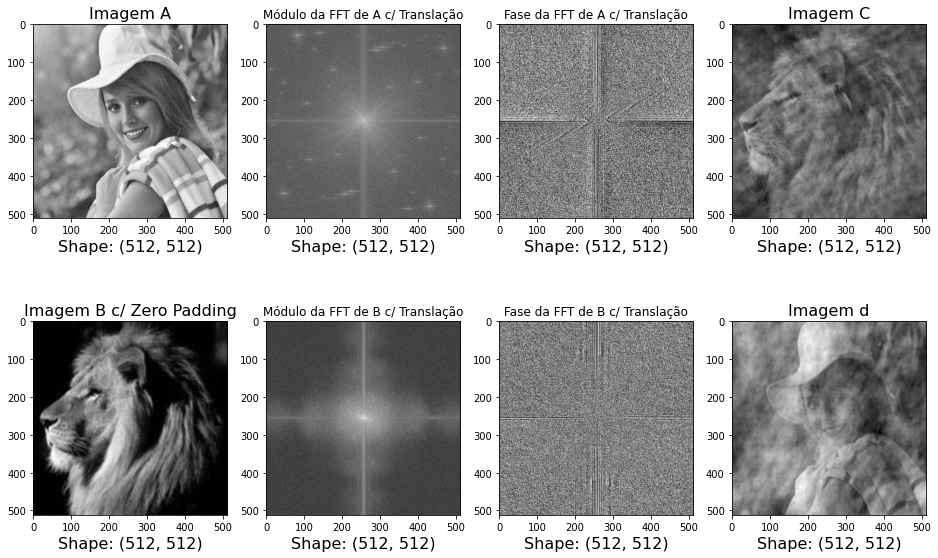

In [2]:
#  IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 1 - letra (a)
# carrega as imagens a e b como escala de cinza
imagem_a = cv2.imread("imagens/elaine.512.tiff", 0)
imagem_b = cv2.imread("imagens/leon.jpg", 0)

# redimenciona a imagem b para ter o mesmo tamanho da imagem a
im_b =cv2.resize(imagem_b, (imagem_a.shape[0], imagem_a.shape[1]))

# aplica a transformada rápida de fourier
fft_a = np.fft.fft2(imagem_a)
fft_b = np.fft.fft2(im_b)

# aplica translação às transformadas
fft_a_shift = np.fft.fftshift(fft_a)
fft_b_shift = np.fft.fftshift(fft_b)

# combina as imagens
fft_c = np.abs(fft_a) * np.exp(1j * np.angle(fft_b))
fft_d = np.abs(fft_b) * np.exp(1j * np.angle(fft_a))

# aplica a transformada inversa
imagem_c = np.fft.ifft2(fft_c).real
imagem_d = np.fft.ifft2(fft_d).real

imagem_c = (255 * ((imagem_c - np.min(imagem_c )) / np.max(imagem_c - np.min(imagem_c )))).astype(np.uint8)
print(imagem_c.dtype)

fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize=(16, 10))

# primeira subfigura da primeira linha
axs[0][0].imshow(imagem_a, cmap="gray")
axs[0][0].set_title("Imagem A", fontsize = 16)
axs[0][0].set_xlabel("Shape: {}".format(imagem_a.shape), fontsize = 16)

# segunda subfigura da primeira linha
axs[0][1].imshow(np.log( np.abs(fft_a_shift)+1 ), cmap="gray")
axs[0][1].set_title("Módulo da FFT de A c/ Translação")
axs[0][1].set_xlabel("Shape: {}".format(fft_a_shift.shape), fontsize = 16)

# terceira subfigura da primeira linha
axs[0][2].imshow(np.angle(fft_a_shift), cmap="gray")
axs[0][2].set_title("Fase da FFT de A c/ Translação")
axs[0][2].set_xlabel("Shape: {}".format(imagem_a.shape), fontsize = 16)

# quarta subfigura da primeira linha
axs[0][3].imshow(imagem_c, cmap="gray")
axs[0][3].set_title("Imagem C", fontsize = 16)
axs[0][3].set_xlabel("Shape: {}".format(imagem_c.shape), fontsize = 16)

# primeira subfigura da segunda linha
axs[1][0].imshow(im_b, cmap="gray")
axs[1][0].set_title("Imagem B c/ Zero Padding", fontsize = 16)
axs[1][0].set_xlabel("Shape: {}".format(im_b.shape), fontsize = 16)

# segunda subfigura da segunda linha
axs[1][1].imshow(np.log( np.abs(fft_b_shift)+1 ), cmap="gray")
axs[1][1].set_title("Módulo da FFT de B c/ Translação")
axs[1][1].set_xlabel("Shape: {}".format(fft_b_shift.shape), fontsize = 16)

# terceira subfigura da segunda linha
axs[1][2].imshow(np.angle(fft_b_shift), cmap="gray")
axs[1][2].set_title("Fase da FFT de B c/ Translação")
axs[1][2].set_xlabel("Shape: {}".format(fft_b_shift.shape), fontsize = 16)

# quarta subfigura da segunda linha
axs[1][3].imshow(imagem_d, cmap="gray")
axs[1][3].set_title("Imagem d", fontsize = 16)
axs[1][3].set_xlabel("Shape: {}".format(imagem_d.shape), fontsize = 16)

Text(0.5, 1.0, 'Módulo da FFT de A c/ Translação')

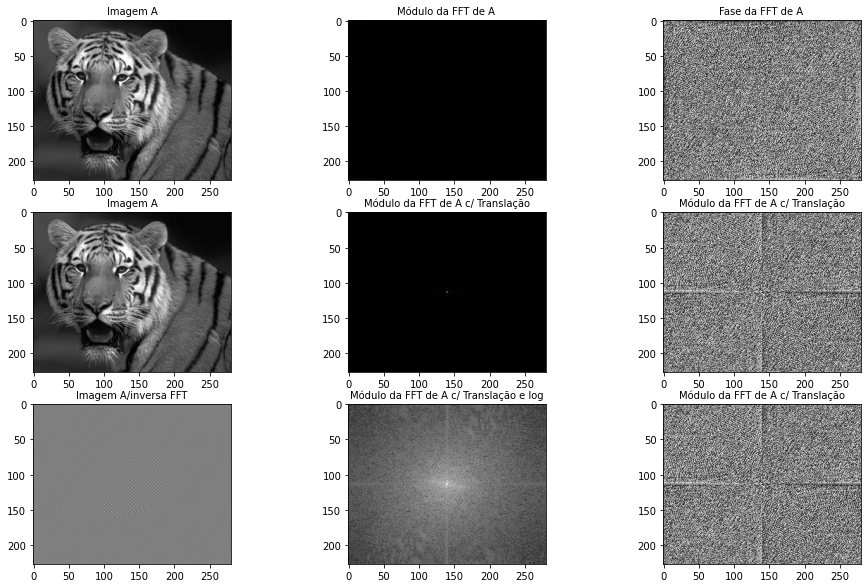

In [13]:
# IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 1 - LETRA (b)

# carrega as imagens a como escala de cinza
imagem_a = cv2.imread("imagens/tiger.jpg", 0)


# aplica a transformada rápida de fourier
fft_a = np.fft.fft2(imagem_a)


# aplica translação às transformadas
fft_a_shift = np.fft.fftshift(fft_a)


fft_a_shift_log = np.log( np.abs(fft_a_shift)+1 )


# aplica a transformada inversa
imagem_a_i = np.fft.ifft2(fft_a_shift).real

fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(16, 10))

# primeira subfigura da primeira linha
axs[0][0].imshow(imagem_a, cmap="gray")
axs[0][0].set_title("Imagem A", fontsize = 10)


# segunda subfigura da primeira linha
axs[0][1].imshow(np.abs(fft_a), cmap="gray")
axs[0][1].set_title("Módulo da FFT de A ", fontsize = 10)


# segunda subfigura da primeira linha
axs[0][2].imshow(np.angle(fft_a), cmap="gray")
axs[0][2].set_title("Fase da FFT de A ", fontsize = 10)


axs[1][0].imshow(imagem_a, cmap="gray")
axs[1][0].set_title("Imagem A", fontsize = 10)


# segunda subfigura da primeira linha
axs[1][1].imshow(np.abs(fft_a_shift), cmap="gray")
axs[1][1].set_title("Módulo da FFT de A c/ Translação", fontsize = 10)


# segunda subfigura da primeira linha
axs[1][2].imshow(np.angle(fft_a_shift), cmap="gray")
axs[1][2].set_title("Módulo da FFT de A c/ Translação", fontsize = 10)


axs[2][0].imshow(imagem_a_i, cmap="gray")
axs[2][0].set_title("Imagem A/inversa FFT", fontsize = 10)


# segunda subfigura da primeira linha
axs[2][1].imshow(fft_a_shift_log, cmap="gray")
axs[2][1].set_title("Módulo da FFT de A c/ Translação e log", fontsize = 10)


# segunda subfigura da primeira linha
axs[2][2].imshow(np.angle(fft_a_shift), cmap="gray")
axs[2][2].set_title("Módulo da FFT de A c/ Translação", fontsize = 10)



## <span style='color:green'>Respostas da Questão 1:</span>

* (a) Após a mistura das imagens fica claro a identificação de que a fase possui mais informações sobre a imagem. Isso vêm do fato que o deslocamento entre os sinais é mais informativos que a amplitude do mesmo.
* (b) Não é possivél identificar a imagem orinal na resultante, por que como o modulo foi deslocado as coponentes em baixa frequencia por exemplo, tem valores em faixa central. Não sendo apresentado a imagem como antes e como apenas o mulo foi deslocado e a fase não ocorre a uma divergencia.

### Filtragem em Frequência

Conforme visto nas aulas de PDI, imagens também podem ser filtradas no domínio da frequência utilizando FFT, uma abordagem mais condizente com o termo "filtragem". Para realizar a filtragem, é necessário realizar os seguintes passos:

1. Obter os parâmetros de preenchimento Mp e Np. 
2. Realizar o preenchimento da imagem de entrada.
3. Calcular a FFT da imagem de entrada.
4. Aplicar a translação para centralizar a transformada da imagem.
5. Realizar o preenchimento do filtro utilizado.
6. Calcular a FFT do filtro utilizado.
7. Aplicar a translação para centralizar a transformada do filtro.
8. Obter a FFT da imagem filtrada a partir do produto entre as FFTs da imagem e do filtro.
9. Desfazer a translação e realizar a transformada inversa.

Esse procedimento é realizado nas duas células a seguir, em que a primeira célula define algumas funções auxiliares e a segunda realiza a filtragem em frequência e a filtragem no espaço para que se possa comparar os resultados.

In [14]:
# essa célula contém funções auxiliares para a realização da filtragem em frequência.
def get_2d_gaussian_kernel(size, sigma, dtype = cv2.CV_32F):
    '''essa função retorna um filtro gaussiano 2d com base no tamanho e sgima especificados.'''
    
    # produz filtros 1d nas direções x e y
    kernel_y = cv2.getGaussianKernel(size, sigma, ktype = dtype)
    kernel_x = cv2.getGaussianKernel(size, sigma, ktype = dtype).T
    
    # retorna o produto matricial dos filtros para produzir um filtro 2d
    return np.dot( kernel_y, kernel_x )

def paddedsize(src_img, kernel):
    '''essa função determina o menor tamanho apropriado para a realização da 
    filtragem em frequência a partir de uma imagem (scr_img) e um filtro (kernel)'''
    
    # extrai as dimensões da imagem e do filtro
    H_i, W_i = src_img.shape
    H_k, W_k = kernel.shape
    
    # encontra o menor tamanho que satisfaz as condições de filtragem
    H = H_i + H_k -1
    W = W_i + W_k -1
    
    # ajusta H e W para que sejam pares
    H = (H+1) if H % 2 != 0 else H
    W = (W+1) if W % 2 != 0 else W
    
    return H, W

def apply_padding(img, shape, dtype):
    '''essa função aplica zero-padding em uma imagem com base no shape fornecido'''
    
    padded = np.zeros(shape, dtype)
    padded[:img.shape[0], :img.shape[1]] = img
    
    return padded

 ## <span style='color:blue'>Questão 2: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>
 
* O código abaixo realiza a filtragem a partir de um filtro passa-baixas Gaussiano:
    * (a) Que elementos na FFT do filtro permitem identificar que se trata de um filtro passa-baixas?
    * (b) Ajuste o tamanho do filtro a partir da variável ksize e comente o que acontece com o módulo da sua FFT.

Text(0.5, 0, 'Shape: (522, 522)')

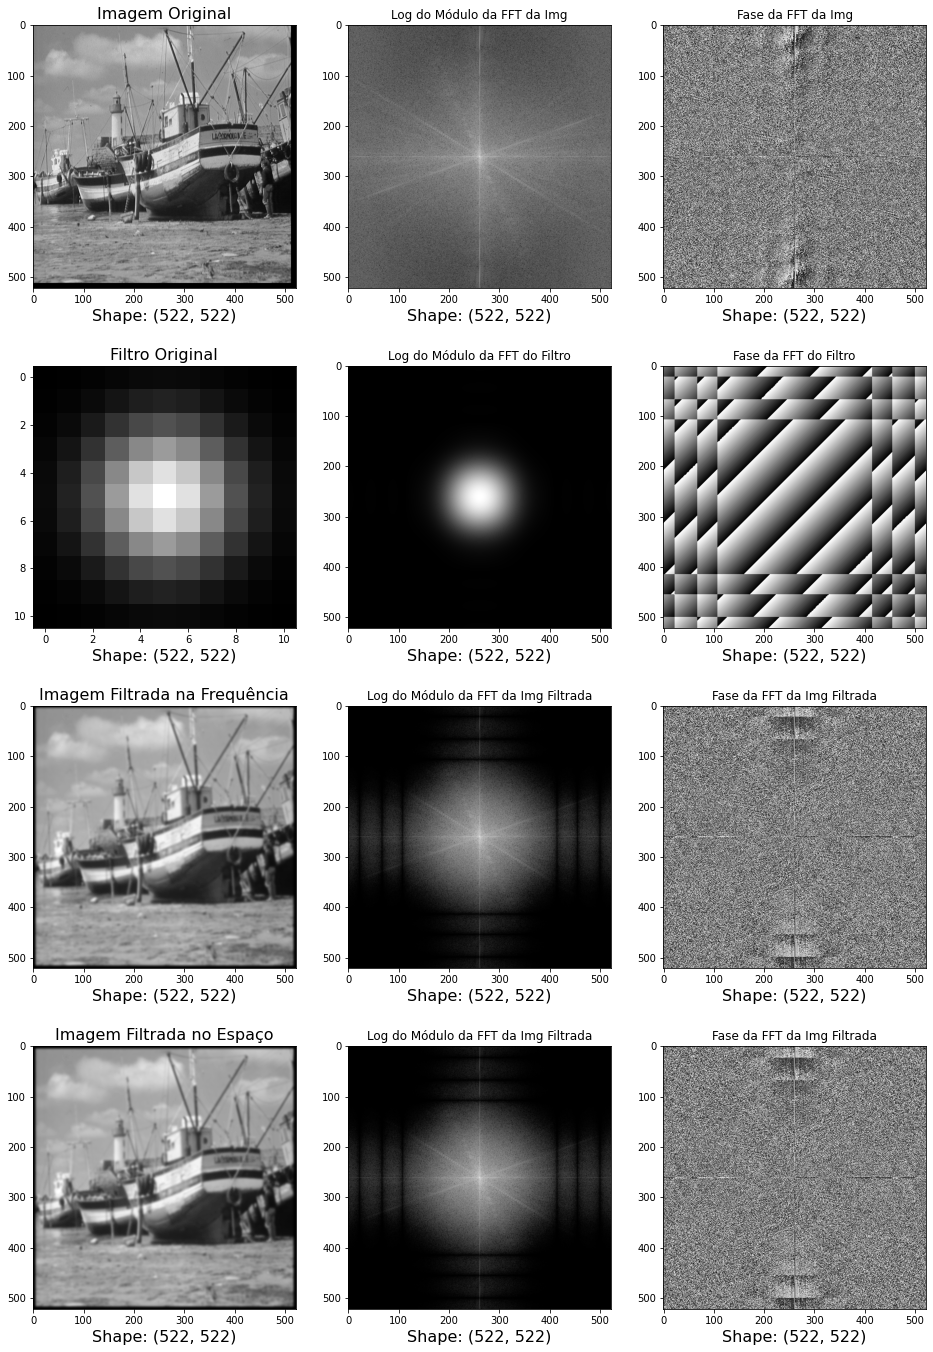

In [15]:
# imagem a ser filtrada
src_img  = cv2.imread('imagens/boat.512.tiff', 0)

# filtro utilizado
sigma  = 0
ksize  = 11
kernel = get_2d_gaussian_kernel( ksize, sigma)

# Encontra o tamanho minimo das imagens
H, W = paddedsize(src_img, kernel)

# aplica padding na imagem e no filtro
pad_img = apply_padding(src_img, (H, W), np.float64)
pad_knl = apply_padding(kernel,  (H, W), np.float64)

# aplica a transformada
img_fft = np.fft.fft2( pad_img )
knl_fft = np.fft.fft2( pad_knl )

# aplica translação para centralizar a imagem
img_shift = np.fft.fftshift( img_fft )
knl_shift = np.fft.fftshift( knl_fft )

# multiplica para realizar a filtragem
dst_shift = img_shift * knl_shift

# desfaz a translação e obtém a imagem correspondente no domínio do tempo a partir da IFFT
dst_fft = np.fft.ifftshift( dst_shift )
frq_dst_img = np.fft.ifft2( dst_fft ).real

# filtragem no espaço
spa_dst_img  = convolve2d( src_img, kernel, mode = "full", boundary = "fill", fillvalue = 0).astype(np.float64)

# FFT para obter a resposta em frequência da convolução no espaço
pad_spa_dst_img   = apply_padding(spa_dst_img, (H, W), np.float64)
spa_dst_img_fft   = np.fft.fft2( pad_spa_dst_img )
spa_dst_img_shift = np.fft.fftshift( spa_dst_img_fft )

fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (16, 24))

axs[0][0].imshow(pad_img, cmap = "gray")
axs[0][0].set_title("Imagem Original", fontsize = 16)
axs[0][0].set_xlabel("Shape: {}".format(pad_img.shape), fontsize = 16)

axs[0][1].imshow( np.log(np.abs(img_shift)+1) , cmap = "gray")
axs[0][1].set_title("Log do Módulo da FFT da Img")
axs[0][1].set_xlabel("Shape: {}".format(img_shift.shape), fontsize = 16)

axs[0][2].imshow(np.angle(img_shift), cmap = "gray")
axs[0][2].set_title("Fase da FFT da Img")
axs[0][2].set_xlabel("Shape: {}".format(img_shift.shape), fontsize = 16)

axs[1][0].imshow(kernel, cmap="gray")
axs[1][0].set_title("Filtro Original", fontsize = 16)
axs[1][0].set_xlabel("Shape: {}".format(pad_knl.shape), fontsize = 16)

axs[1][1].imshow( np.log(np.abs(knl_shift)+1) , cmap = "gray")
axs[1][1].set_title("Log do Módulo da FFT do Filtro")
axs[1][1].set_xlabel("Shape: {}".format(knl_shift.shape), fontsize = 16)

axs[1][2].imshow(np.angle(knl_shift), cmap = "gray")
axs[1][2].set_title("Fase da FFT do Filtro")
axs[1][2].set_xlabel("Shape: {}".format(knl_shift.shape), fontsize = 16)

axs[2][0].imshow(frq_dst_img, cmap = "gray")
axs[2][0].set_title("Imagem Filtrada na Frequência", fontsize = 16)
axs[2][0].set_xlabel("Shape: {}".format(frq_dst_img.shape), fontsize = 16)

axs[2][1].imshow( np.log(np.abs(dst_shift)+1) , cmap = "gray")
axs[2][1].set_title("Log do Módulo da FFT da Img Filtrada")
axs[2][1].set_xlabel("Shape: {}".format(dst_shift.shape), fontsize = 16)

axs[2][2].imshow(np.angle(dst_shift), cmap = "gray")
axs[2][2].set_title("Fase da FFT da Img Filtrada")
axs[2][2].set_xlabel("Shape: {}".format(dst_shift.shape), fontsize = 16)

axs[3][0].imshow(spa_dst_img, cmap = "gray")
axs[3][0].set_title("Imagem Filtrada no Espaço", fontsize = 16)
axs[3][0].set_xlabel("Shape: {}".format(spa_dst_img.shape), fontsize = 16)

axs[3][1].imshow( np.log(np.abs(spa_dst_img_shift)+1) , cmap = "gray")
axs[3][1].set_title("Log do Módulo da FFT da Img Filtrada")
axs[3][1].set_xlabel("Shape: {}".format(spa_dst_img_shift.shape), fontsize = 16)

axs[3][2].imshow(np.angle(spa_dst_img_shift), cmap = "gray")
axs[3][2].set_title("Fase da FFT da Img Filtrada")
axs[3][2].set_xlabel("Shape: {}".format(spa_dst_img_shift.shape), fontsize = 16)

## <span style='color:green'>Respostas da Questão 2:</span>

* (a) Ao por meio da plotagem do módulo da transformada do filtro é possivel visualizar que apaenas o centro é iluminado, porém é possivel observar que o centr não é no zero por assim dizer, isso ocorre devido ao deslocamento da transformada para melhor visualização, se não realizarmos o deslocamento é possivél obsevar que o centro da iluminação está em torno dos menores valores caracterizando um filtro passa baixa.
* (b) Ao aumentarmos o valor do tamano é possivel observar que ele se torna cada vez mais restrito as frequencias mais baixas, isso se dá pelo o fato que como a frequencia é o inverso do tempo(nesse caso o espaço), quando se aumenta o espaço, torna as componente de frequancia menores. Tais observações podem ser verificadas no modulo do filtro e no resultado quando se é alterado seu tamanho. 

* **Observe que a filtragem em frequência foi equivalente a uma filtragem espacial utilizando convoluções do tipo "full", o que resulta em uma borda escura em torno da imagem de saída e de uma imagem de saída pouco maior que a imagem de entrada.**
* **Se quiséssemos uma convolução do tipo "same" ou "valid", bastaria recortar a imagem de saída para eliminar elementos da borda e obteríamos imagens idênticas.**

## <span style='color:blue'>Questão 3: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* O código abaixo ilustra a magnitude da FFT de diversos filtros. Classifique-os em filtros passa-baixas e filtros passa-altas. Justifique.

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

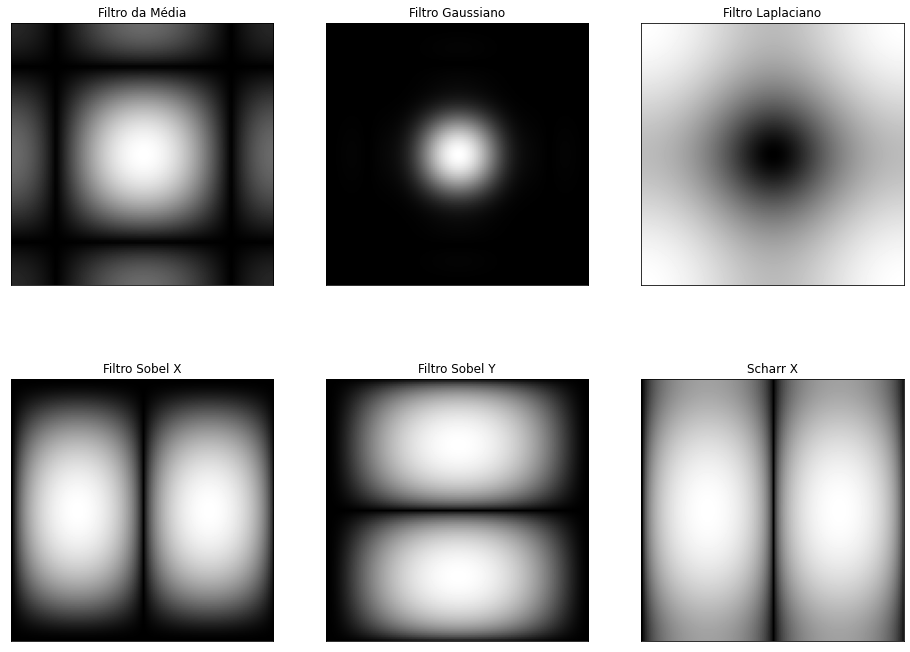

In [17]:
# filtro da média
mean_filter  = (np.ones((3, 3)) / 9)

# filtro gaussiano
gauss_filter = get_2d_gaussian_kernel(9, 0)

# filtros de detecção de borda
# scharr in x-direction
scharr_filter = np.array([[-3, 0, 3], [-10,0,10], [-3, 0, 3]])

# sobel in x direction
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# sobel in y direction
sobel_y = np.array([[-1,-2,-1], [0, 0, 0], [1, 2, 1]])

# laplacian
laplacian = np.array([[0, 1, 0], [1,-4, 1], [0, 1, 0]])

# lista os filtros
filters = [mean_filter, gauss_filter, laplacian, sobel_x, sobel_y, scharr_filter]

# lista os nomes dos filtros
filter_name = ["Filtro da Média", "Filtro Gaussiano","Filtro Laplaciano", "Filtro Sobel X", "Filtro Sobel Y", "Scharr X"]

# computa a FFT dos filtros da lista
fft_filters = [np.fft.fft2(x, (128,128)) for x in filters]

# aplica fftshift na FFT de cada filtro
fft_shift = [np.fft.fftshift(y) for y in fft_filters]

# obtém a magnitude da FFT de cada filtro
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 12))

# plota todos os filtros
for i, ax in enumerate(axs.flat):
    plt.sca(ax)
    plt.imshow(mag_spectrum[i], cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
    
mean_filter 

In [18]:
gauss_filter

array([[0.00024414, 0.00079346, 0.00183105, 0.00311279, 0.00366211,
        0.00311279, 0.00183105, 0.00079346, 0.00024414],
       [0.00079346, 0.00257874, 0.00595093, 0.01011658, 0.01190186,
        0.01011658, 0.00595093, 0.00257874, 0.00079346],
       [0.00183105, 0.00595093, 0.01373291, 0.02334595, 0.02746582,
        0.02334595, 0.01373291, 0.00595093, 0.00183105],
       [0.00311279, 0.01011658, 0.02334595, 0.03968811, 0.04669189,
        0.03968811, 0.02334595, 0.01011658, 0.00311279],
       [0.00366211, 0.01190186, 0.02746582, 0.04669189, 0.05493164,
        0.04669189, 0.02746582, 0.01190186, 0.00366211],
       [0.00311279, 0.01011658, 0.02334595, 0.03968811, 0.04669189,
        0.03968811, 0.02334595, 0.01011658, 0.00311279],
       [0.00183105, 0.00595093, 0.01373291, 0.02334595, 0.02746582,
        0.02334595, 0.01373291, 0.00595093, 0.00183105],
       [0.00079346, 0.00257874, 0.00595093, 0.01011658, 0.01190186,
        0.01011658, 0.00595093, 0.00257874, 0.00079346],


## <span style='color:green'>Respostas da Questão 3:</span>

* Por meio da plotagem dos modódulos das respectivas transformadas dos filtros é possivel observar diferente iluminações, ou seja, quando está mais claro em torno do centro (zero real da transformada), é possivél classificar como passa baixa. Já quando está proxímo a borda(valores mais altos da transformada) são ditos filtros passa alta. Desse modo os filtros passa baixa e  passa alta são respectivamente: Media, Gaussiano e Laplace, Sobel(ambos os tipos) e Scharr X.

 ## <span style='color:blue'>Questão 4: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* Substitua no código abaixo kernel pelos filtros acima e teste os resultados. Utilize quantas células for necessário.

(514, 514)

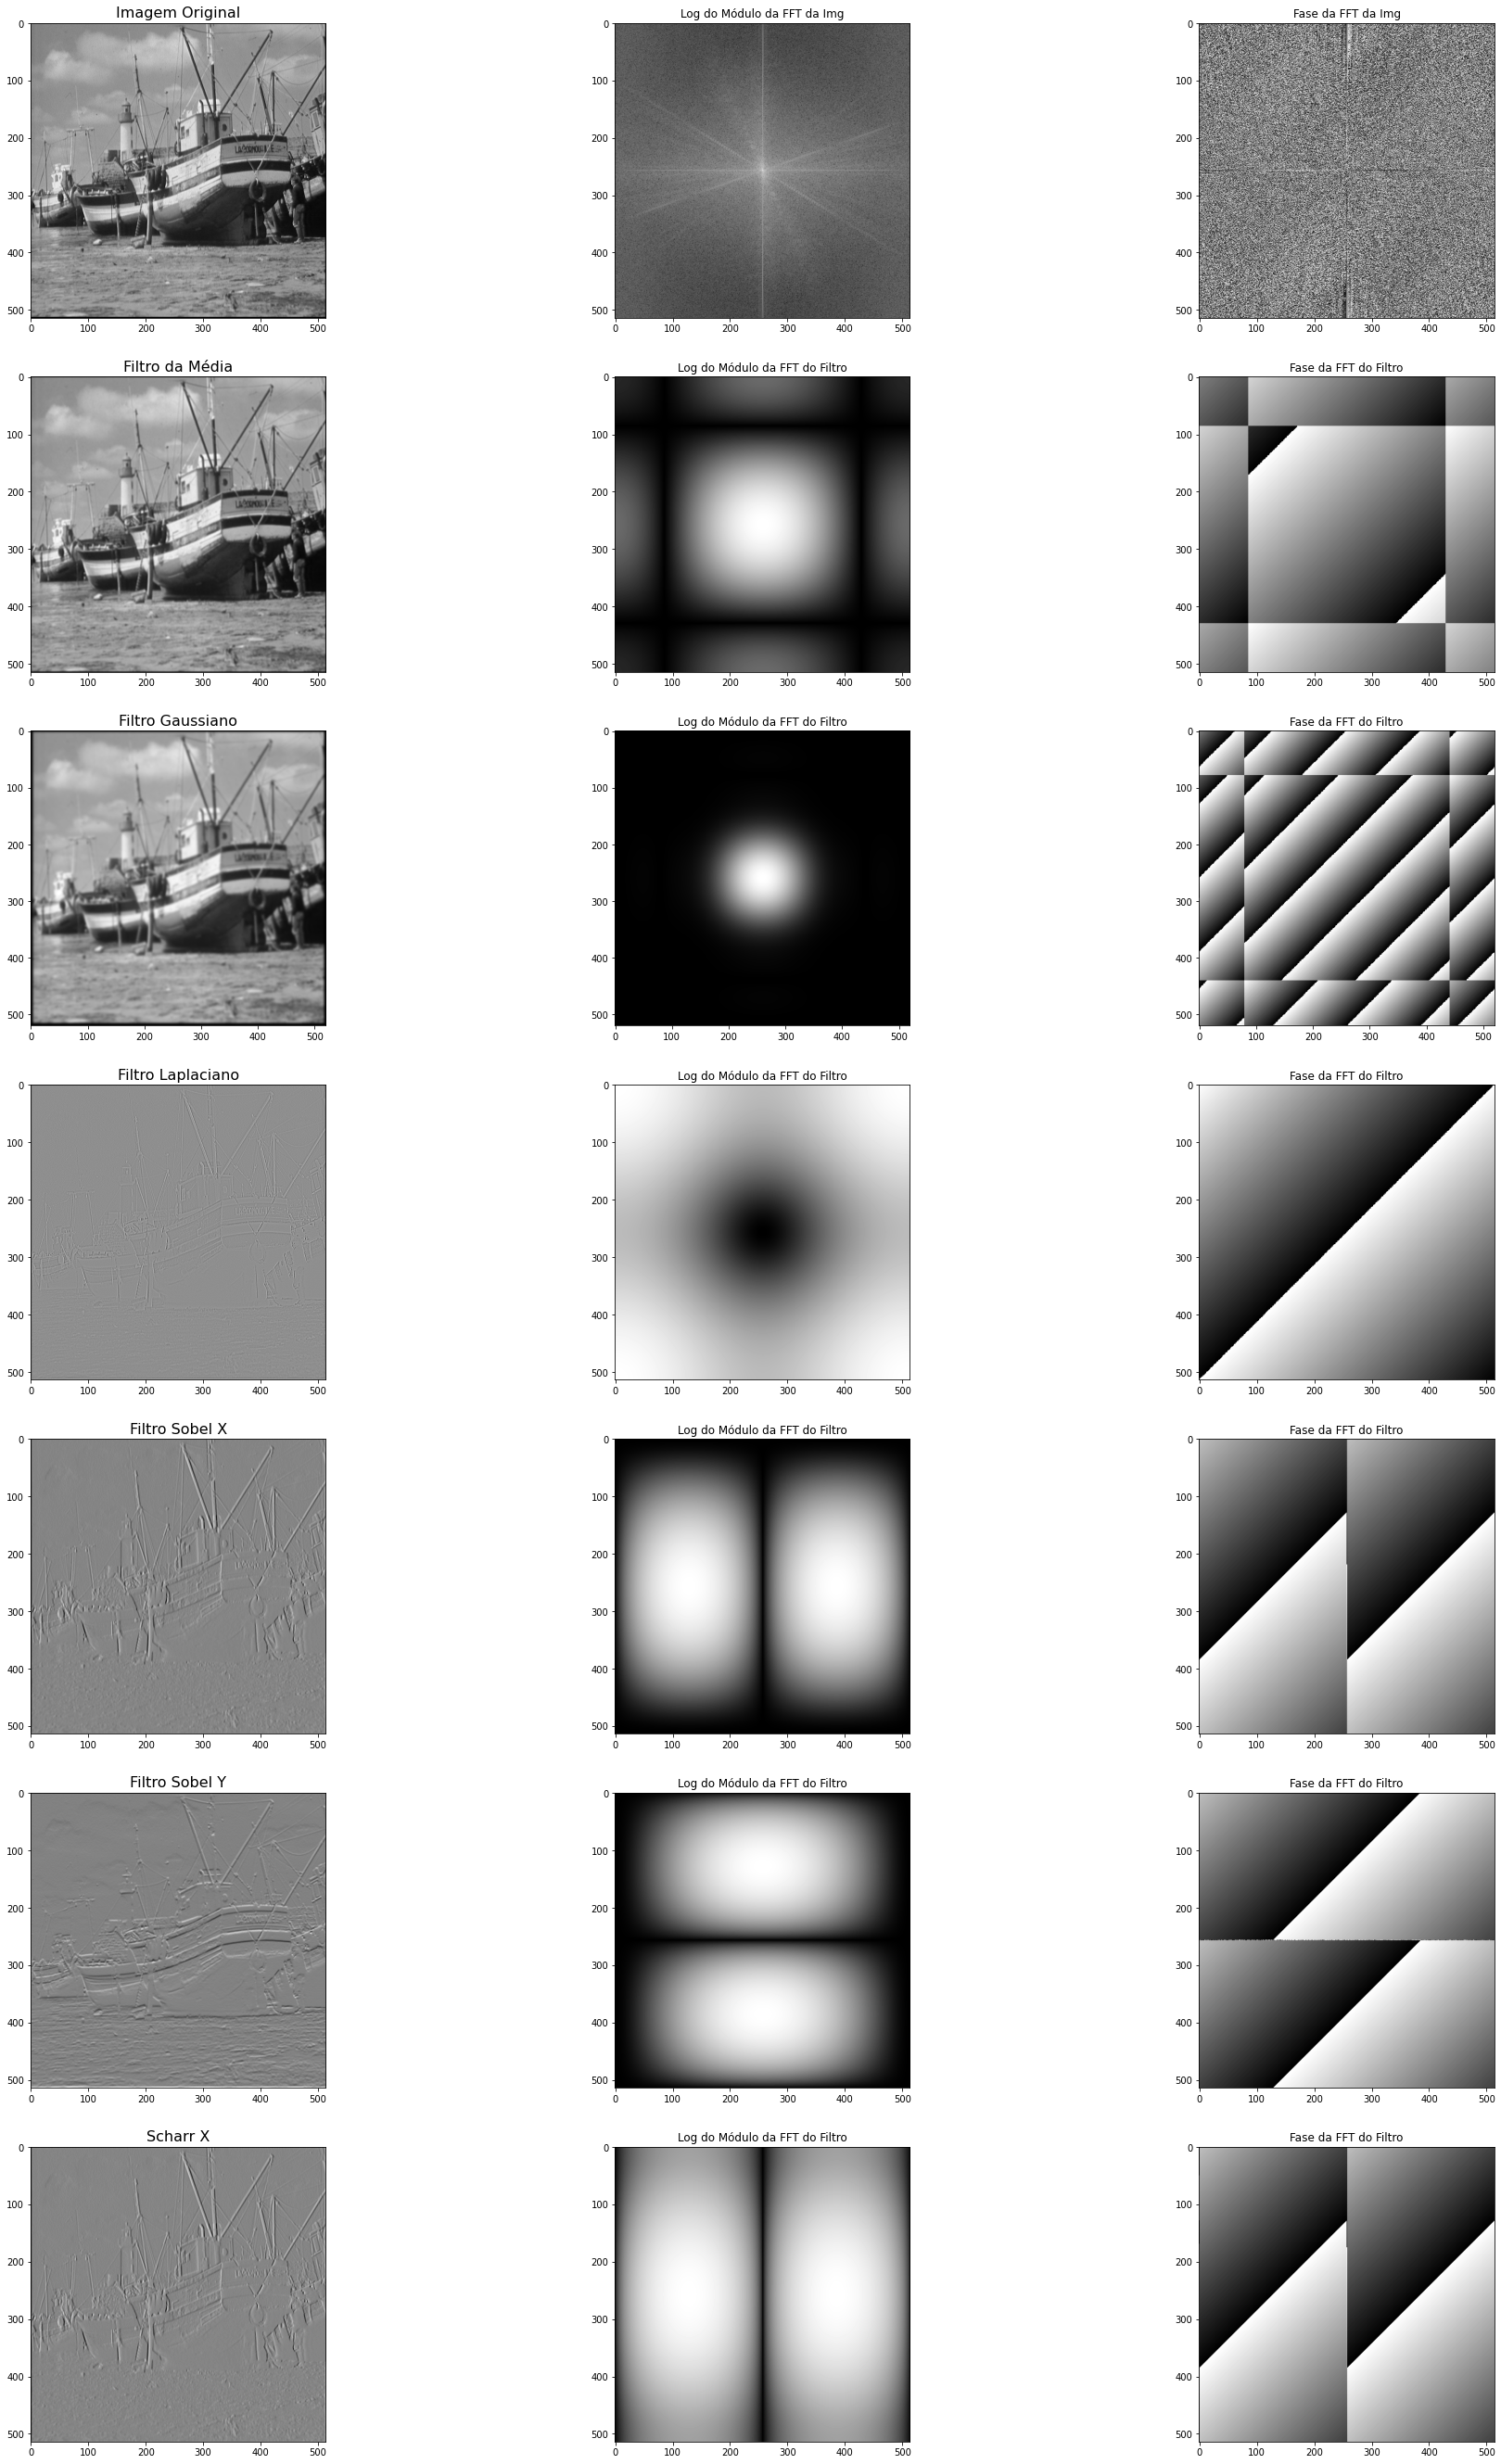

In [60]:
# SUBSTITUA OS FILTROS AQUI --> QUESTÃO 4 
# imagem a ser filtrada
src_img  = cv2.imread('imagens/boat.512.tiff', 0)
H, W = paddedsize(src_img, filters[0])

# aplica padding na imagem e no filtro
pad_img = apply_padding(src_img, (H, W), np.float64)

# aplica a transformada
img_fft = np.fft.fft2( pad_img )

# aplica translação para centralizar a imagem
img_shift = np.fft.fftshift( img_fft )

fig, axs = plt.subplots(nrows = len(filters)+1, ncols = 3, figsize = (32, 48))

axs[0][0].imshow(pad_img, cmap = "gray")
axs[0][0].set_title("Imagem Original", fontsize = 16)


axs[0][1].imshow( np.log(np.abs(img_shift)+1) , cmap = "gray")
axs[0][1].set_title("Log do Módulo da FFT da Img")


axs[0][2].imshow(np.angle(img_shift), cmap = "gray")
axs[0][2].set_title("Fase da FFT da Img")


for i in range(len(filters)):

        # filtro utilizado
        kernel = filters[i]

        # Encontra o tamanho minimo das imagens
        H, W = paddedsize(src_img, kernel)

        # aplica padding na imagem e no filtro
        pad_img = apply_padding(src_img, (H, W), np.float64)
        pad_knl = apply_padding(kernel,  (H, W), np.float64)

        # aplica a transformada
        img_fft = np.fft.fft2( pad_img )
        knl_fft = np.fft.fft2( pad_knl )

        # aplica translação para centralizar a imagem
        img_shift = np.fft.fftshift( img_fft )
        knl_shift = np.fft.fftshift( knl_fft )

        # multiplica para realizar a filtragem
        dst_shift = img_shift * knl_shift

        # desfaz a translação e obtém a imagem correspondente no domínio do tempo a partir da IFFT
        dst_fft = np.fft.ifftshift( dst_shift )
        frq_dst_img = np.fft.ifft2( dst_fft ).real

        # filtragem no espaço
        spa_dst_img  = convolve2d( src_img, kernel, mode = "full", boundary = "fill", fillvalue = 0).astype(np.float64)

        # FFT para obter a resposta em frequência da convolução no espaço
        pad_spa_dst_img   = apply_padding(spa_dst_img, (H, W), np.float64)
        spa_dst_img_fft   = np.fft.fft2( pad_spa_dst_img )
        spa_dst_img_shift = np.fft.fftshift( spa_dst_img_fft )


        axs[i+1][0].imshow(frq_dst_img, cmap="gray")
        axs[i+1][0].set_title(str(filter_name[i]), fontsize = 16)
       

        axs[i+1][1].imshow( np.log(np.abs(knl_shift)+1) , cmap = "gray")
        axs[i+1][1].set_title("Log do Módulo da FFT do Filtro")
      

        axs[i+1][2].imshow(np.angle(knl_shift), cmap = "gray")
        axs[i+1][2].set_title("Fase da FFT do Filtro")
       


### Tempo de processamento

Observe que o tamanho dos filtros é uma variável de baixo impacto no número de operações realizado na filtragem em frequência, o que não pode ser dito para a filtragem no espaço. Para medir o impacto desse fenômeno sobre o tempo de execução dos algoritmos, as células abaixo utilizam a mágica **%%timeit**, que computa o tempo médio de execução de uma célula.

In [8]:
def freq_filt(src_img, kernel):
    '''essa função realiza a filtragem em frequência a partir de uma imagem (src_img) e um filtro (kernel).'''
    
    # encontra o tamanho minimo das imagens
    H, W = paddedsize(src_img, kernel)
    
    # aplica padding na imagem e no filtro
    pad_img = apply_padding(src_img, (H, W), np.float64)
    pad_knl = apply_padding(kernel, (H, W), np.float64)
    
    # aplica a transformada
    img_fft = np.fft.fft2(pad_img)
    knl_fft = np.fft.fft2(pad_knl)
    
    # aplica translação para centralizar a imagem
    img_shift = np.fft.fftshift(img_fft)
    knl_shift = np.fft.fftshift(knl_fft)
    
    # multiplica para realizar a filtragem
    dst_shift = img_shift * knl_shift
    
    # desfaz a translação
    dst_fft = np.fft.ifftshift(dst_shift)
    dst_img = np.fft.ifft2(dst_fft).real
    
    return dst_img

 ## <span style='color:blue'>Questão 5: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>
* Execute as células abaixo utilizando filtros de lado 3, 7, 11 e 25 e comente os resultados observados.

In [9]:
ksize = 3
sigma = 0
kernel = get_2d_gaussian_kernel( ksize, sigma )
lenna = cv2.imread("imagens/lenna.tif", 0 )
print("lenna.shape:", lenna.shape)

lenna.shape: (256, 256)


In [10]:
%%timeit
output = convolve2d( lenna, kernel, mode="full", boundary="fill", fillvalue=0 ).astype(np.float64)

3.04 ms ± 74.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit
output = freq_filt( lenna, kernel )

10.3 ms ± 69.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
ksize = 7
sigma = 0
kernel = get_2d_gaussian_kernel( ksize, sigma)
lenna = cv2.imread("imagens/lenna.tif", 0)
print("lenna.shape:", lenna.shape)

lenna.shape: (256, 256)


In [13]:
%%timeit
output = convolve2d( lenna, kernel, mode="full", boundary="fill", fillvalue=0 ).astype(np.float64)

11.7 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%%timeit
output = freq_filt( lenna, kernel )

17.7 ms ± 660 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
ksize = 11
sigma = 0
kernel = get_2d_gaussian_kernel(ksize, sigma)
lenna = cv2.imread("imagens/lenna.tif", 0)
print("lenna.shape:", lenna.shape)

lenna.shape: (256, 256)


In [16]:
%%timeit
output = convolve2d(lenna, kernel, mode="full", boundary="fill", fillvalue=0 ).astype(np.float64)

22.1 ms ± 742 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit
output = freq_filt(lenna, kernel)

8.99 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
ksize = 25
sigma = 0
kernel = get_2d_gaussian_kernel(ksize, sigma)
lenna = cv2.imread("imagens/lenna.tif", 0)
print("lenna.shape:", lenna.shape)

lenna.shape: (256, 256)


In [19]:
%%timeit
output = convolve2d( lenna, kernel, mode="full", boundary="fill", fillvalue=0 ).astype(np.float64)

115 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%%timeit
output = freq_filt(lenna, kernel)

7.56 ms ± 556 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## <span style='color:green'>Respostas da Questão 5:</span>
* É notavél que o tempo gasto na convolução cresce ao incrementar o tamanho do filtro, isso ocorre pois quanto maior o filtro a quantidade de somas realizadas a cada iteração cresce de forma quadratica.

***
![cat](https://user-images.githubusercontent.com/58775072/135619414-a3044859-b099-46dc-aa61-fe32c72ee8fe.gif)